In [ ]:
# Importar las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montar los archivos y crear los dataframes
from google.colab import drive
drive.mount('/content/drive')

# Creamos los dataframes

happiness = pd.read_csv('/content/drive/MyDrive/TLG/Visualización de datos con python/reto/Happiness_report.csv')

metadata = pd.read_csv('/content/drive/MyDrive/TLG/Visualización de datos con python/reto/Metadata.csv')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Filtrar la información de México
Crea un dataframe que solo contenga la información de México y establece la columna Country or region como índice.

In [ ]:
# Creamos el dataframe con la información filtrada

mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto

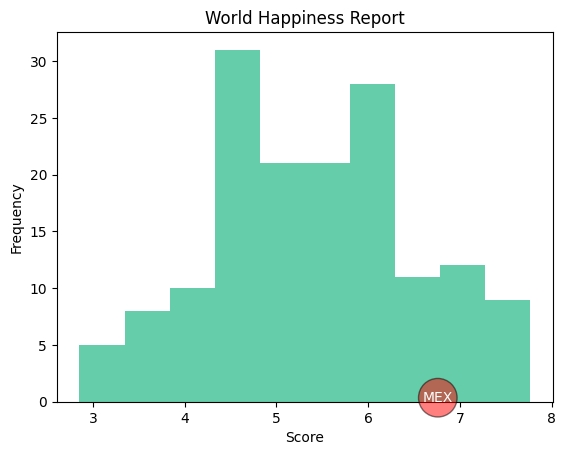

In [ ]:
# Creamos el histograma y editamos sus propiedades

# Gráfico

plt.hist(happiness['Score'], color='mediumaquamarine')
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Etiqueta de texto

mex_tag = happiness.loc[happiness['Country or region'] == 'Mexico', 'Score'].iloc[0]

# Propiedades de la etiqueta de texto

circulo = dict(facecolor='red', alpha=0.5, boxstyle='circle')

plt.annotate("MEX", (mex_tag, 0), color="white",bbox=circulo)

plt.show()


5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación. Ejemplo:

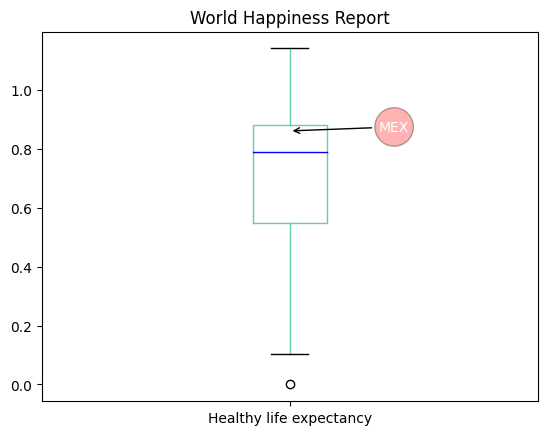

In [ ]:

# Creamos el Boxplot y editamos sus propiedades

# Propiedades de las líneas

caja = dict(linewidth=1, color='mediumaquamarine')
mediana = dict(linewidth=1, color='blue')
bigotes = dict(linewidth=1, color='mediumaquamarine')

# Gráfico

plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels=['Healthy life expectancy'], boxprops=caja, medianprops=mediana,whiskerprops=bigotes)
plt.ylabel('')
plt.title('World Happiness Report')

# Obtener el valor de 'Healthy life expectancy' para México

mex_value = happiness.loc[happiness['Country or region'] == 'Mexico', 'Healthy life expectancy'].iloc[0]

# Etiqueta de texto

plt.annotate('MEX', xy=(1, mex_value), xytext=(1.18, mex_value), color="w",arrowprops=dict(arrowstyle="->", color='black'),bbox=dict(facecolor='red', alpha=0.3, boxstyle='circle'))

plt.show()


6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Ejemplo:

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


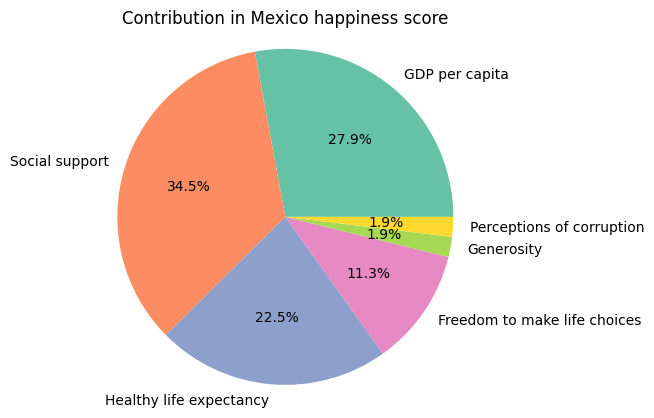

In [ ]:
# Filtrar los datos para México y transformarlos para el gráfico de pastel

# Filtrar los datos para México en otro dataframe
mex_pie = happiness[happiness['Country or region'] == 'Mexico']
mex_pie.set_index('Country or region', inplace=True)
mex_pie.index.name = ''
mex_pie = mex_pie.T
mex_pie = mex_pie.drop(["Overall rank", "Score"], axis=0)
mex_pie = pd.DataFrame(mex_pie)
mex_pie.rename(columns={'Mexico': 'Factors'}, inplace=True)




# Crear el gráfico de pastel
sns.set_palette('Set2')
plt.title('Contribution in Mexico happiness score')
plt.pie(mex_pie['Factors'], autopct='%1.1f%%', labels=mex_pie.index,)
plt.axis('equal')

# Mostrar el dataframe
mex_pie



7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

,Finland,Germany,Mexico,France,South Sudan
Factor,,,,,
GDP per capita,1.340,1.373,1.070,1.324,0.306
Social support,1.587,1.454,1.323,1.472,0.575
Healthy life expectancy,0.986,0.987,0.861,1.045,0.295
Freedom to make life choices,0.596,0.495,0.433,0.436,0.010
Generosity,0.153,0.261,0.074,0.111,0.202
Perceptions of corruption,0.393,0.265,0.073,0.183,0.091


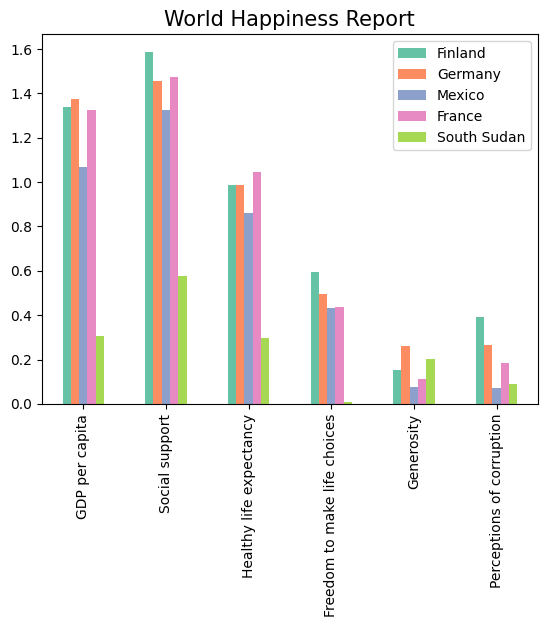

In [ ]:
# Ordenar el dataframe de acuerdo con el ranking  incluyendo al más y al menos feliz de los paises, Mexico y otros dos paises por seleccion

happiness.sort_values(by='Overall rank')
mex_andfour=happiness.iloc[[0,happiness.shape[0]-1],1].tolist() + ['Mexico','Germany','France']

# Nuevo Dataframe  con los 5 paises

five_countries=(happiness[happiness['Country or region'].isin(mex_andfour)]).iloc[:,1:].set_index('Country or region')
five_countries.drop('Score',axis=1,inplace=True)
five_countries=five_countries.T
five_countries.columns.name=''
five_countries.index.name='Factor'

# Gráfico de barras

mex_bar=five_countries.plot.bar(xlabel='')
mex_bar.set_title('World Happiness Report',fontdict={'size':15})


#mostrar el dataframe
five_countries


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

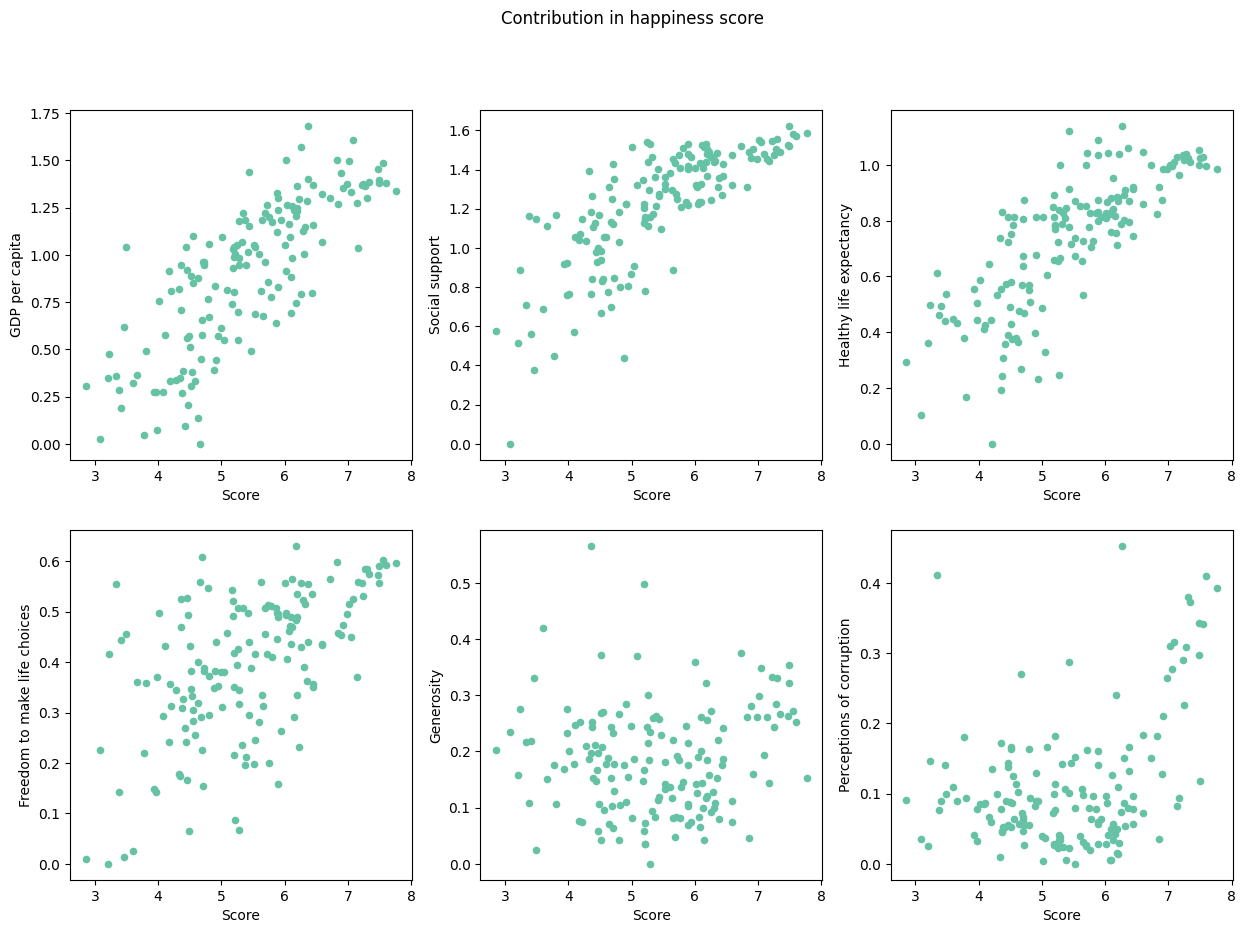

In [ ]:
# Crear la matriz de subgráficas y sus propiedades

fig, axs = plt.subplots(2,3,figsize=(15,10))
fig.suptitle('Contribution in happiness score')

# Definir los parma´metro de cada gráfico en orden

happiness.plot.scatter(x='Score', y='GDP per capita', ax = axs[0,0])
happiness.plot.scatter(x='Score', y='Social support', ax = axs[0,1])
happiness.plot.scatter(x='Score', y='Healthy life expectancy', ax = axs[0,2])
happiness.plot.scatter(x='Score', y='Freedom to make life choices', ax = axs[1,0])
happiness.plot.scatter(x='Score', y='Generosity', ax = axs[1,1])
happiness.plot.scatter(x='Score', y='Perceptions of corruption', ax = axs[1,2])


plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

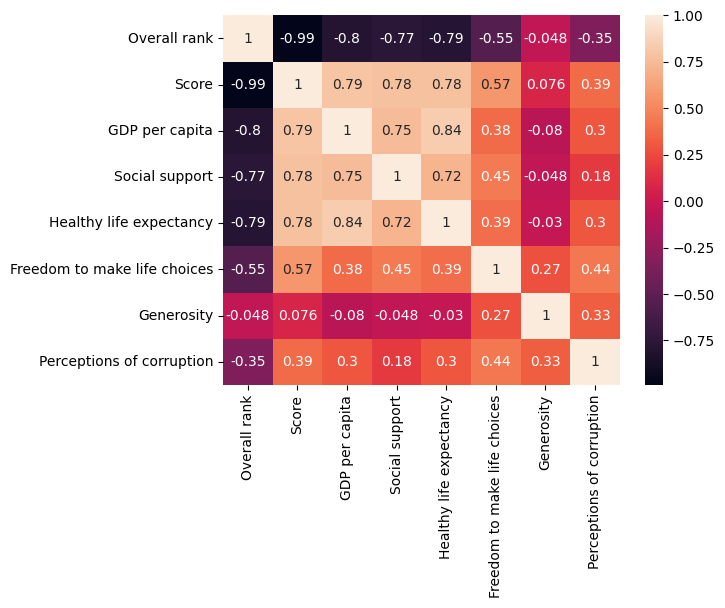

In [ ]:

# Filtrar solo las columnas numéricas
numeric_happiness = happiness.select_dtypes(include=['float64', 'int64'])

# Crear el heatmap de la correlación
sns.heatmap(numeric_happiness.corr(), annot=True)
plt.show()


9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


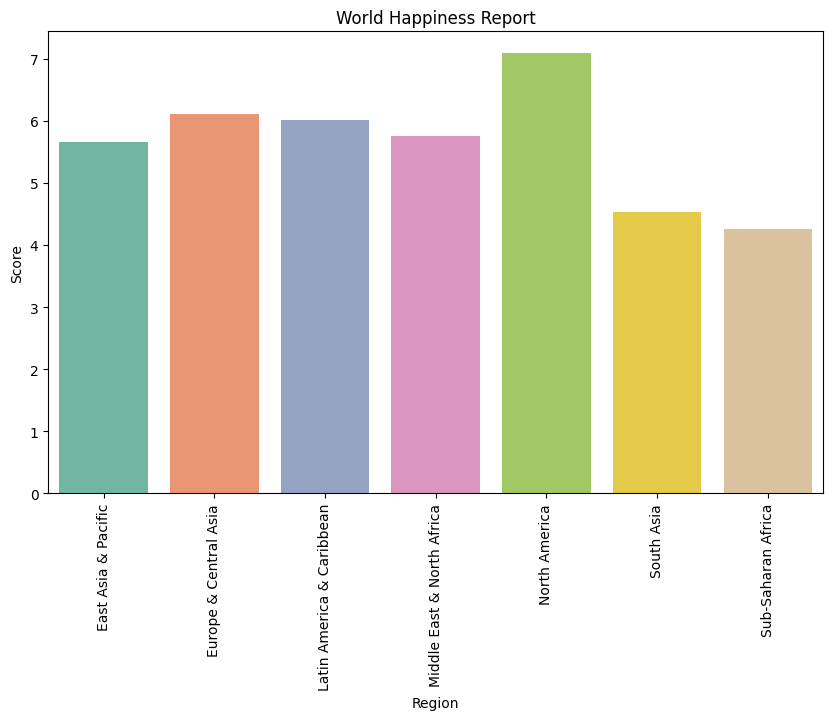

In [ ]:
# Realizar el merge entre los dataframes metadata y happiness para calcular el promedio

happiness_region = happiness.merge(metadata[['TableName', 'Region']], how='left', left_on='Country or region', right_on='TableName')
happiness_region = happiness_region[['Score', 'Region']].groupby('Region').mean()

# Crear el gráfico de barras

plt.figure(figsize=(10, 6))
sns.barplot(data=happiness_region.reset_index(), x='Region', y='Score', hue='Region', dodge=False, palette='Set2')
plt.xticks(rotation=90)
plt.title('World Happiness Report')


# Impresión del dataframe graficado
happiness_region
